# Homework 1 - Credit Analytics
Submission by Dennis Goldenberg

In [281]:
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt

## $\text{\underline{Question 1}}$

### a. Proving $F(X) \sim \text{Uniform}(0,1)$
Note that $F(x) = \mathbb{P}(X \leq x)$ and the support of a probability function is $S(\mathbb{P}(\cdot)) = (0,1]$. Therefore:
$$
\begin{equation*}
F(X) = \mathbb{P}(X \leq X) = 1 \sim \text{Uniform}(0,1)
\end{equation*}
$$

### b. Proving $F^{-1}(U) \equiv X$
Let $U \sim \text{Uniform}(0,1)$. Note that, via the definition of inverse function:
$$
\begin{equation*}
F^{-1}\left(F(X)\right) = X
\end{equation*}
$$
From a, $F(X) \equiv U(0,1)$, so $F^{-1}\left(U\right) \equiv F^{-1}\left(F(X)\right)$. So:
$$
\begin{equation*}
F^{-1}\left(U\right) \equiv F^{-1}\left(F(X)\right) = X \rightarrow F^{-1}\left(U\right) \equiv X
\end{equation*}
$$

### c. Proving $\Phi^{-1}(F(X)) \equiv Y \sim N(0,1)$
From a, $F(X) \equiv U(0,1)$. Note that $F(y) = \Phi(y)$. Using the result from b:
$$
\begin{equation*}
\Phi^{-1}(F(X)) \equiv \Phi^{-1}(U) = F_{Y}^{-1}(U) \equiv Y
\end{equation*}
$$
Thus, $\Phi^{-1}(F(X)) \equiv Y \sim N(0,1)$.

## $\text{\underline{Question 2}}$

### a. Deriving survival function
Note that, from a formula in class, $S(t) = \mathbb{P}(\tau > t) = e^{-\int_0^{t}h(s)ds}$. Thus, I have:
$$ 
\begin{align*}
S(t) = e^{-\int_0^{t}\alpha e^{\beta s}ds} = e^{-\alpha\int_0^{t}e^{\beta s}ds} &= e^{-\alpha\left[\frac{1}{\beta}e^{\beta s}\right]_{0}^{t}} = e^{-\frac{\alpha}{\beta}\left[e^{\beta t} - 1\right]} = e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}
\end{align*}
$$

### b. Deriving the distribution function
Using the fact that $S(t) = 1 - F(t) \rightarrow F(t) + S(t) = 1 \rightarrow F(t) = 1 - S(t)$, I compute:
$$
\begin{equation*}
F(t) = 1 - S(t)  = 1 - e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}} 
\end{equation*}
$$

### c. Deriving the density function 
The density function is the derivative of the disrtibution function. I use this and apply the chain rule for derivatives:
$$
\begin{align*}
f(t) = \frac{d}{dt}F(t) = \frac{d}{dt}\left(1 - e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}\right) &= -e^{\frac{\alpha}{\beta}}\frac{d}{dt}\left(e^{-\frac{\alpha}{\beta}e^{\beta t}}\right)\\
&= -e^{\frac{\alpha}{\beta}} * e^{-\frac{\alpha}{\beta}e^{\beta t}} * \frac{d}{dt}\left(-\frac{\alpha}{\beta}e^{\beta t}\right)\\
&= -e^{\frac{\alpha}{\beta}} * e^{-\frac{\alpha}{\beta}e^{\beta t}} * -\alpha e^{\beta t}\\
&= \alpha e^{\beta t +\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}\\
&= \alpha e^{\beta t + \frac{\alpha}{\beta}\left(1 - e^{\beta t}\right)}
\end{align*}
$$

## $\text{\underline{Question 3}}$

### a. Calculating Expected Value and Variance for Payout at Default
Note that the hazard function is a constant $h(t) = h$. Therefore, the distribution of the probability of default is $f(t) \sim \text{Exponential}(h)$. Further, since 100 dollars is paid out at time of default, and an instantaneous forward rate is $r(t) = r$, I calculate the discount factor from time $t$ back to to time 0 as:
$$
D(0,t) = e^{-\int_0^{t}r(s)ds} = e^{-\int_0^{t}rds} = e^{-rt}
$$
Thus, the present value of a contract that defaults at time $t$ is:
$$
PV(C|\text{Default at time t}) = 100e^{-rt}
$$
The payout for no default is 0, so this does not have to be discounted to the present, as it will still be 0. Therefore, I calculate the expected value:
$$
\begin{align*}
\mathbb{E}[PV(C)] = \int_0^{T}PV_t(C)*\mathbb{P}(\text{default at }t)dt &= \int_0^{T}100e^{-rt}*he^{-ht}dt\\
&= 100h\int_0^{T}e^{-(r + h)t}dt\\
&= 100h\left[\frac{-1}{r + h}e^{-(r + h)t}\right]_0^T\\
&= \frac{100h}{r + h}\left(1 - e^{-(r + h)T}\right)
\end{align*}
$$
For variance, I use a common relation of variance to calculate:
$$
\begin{align*}
&Var[PV(C)] = \mathbb{E}[PV(C)^2] - \mathbb{E}[PV(C)]^2\\
&= \int_0^{T}PV_t(C)^2*\mathbb{P}(\text{default at }t)dt - \left(\frac{100h}{r + h}\left(1 - e^{-(r + h)T}\right)\right)^2\\
&= \int_0^{T}\left(100e^{-rt}\right)^2*he^{-ht} dt - \frac{10,000h^2}{(r + h)^2}\left(1 - e^{-(r + h)T}\right)^2\\
&= 10,000h\int_0^{T}e^{-(2r + h)t}dt - \frac{10,000h^2}{(r + h)^2}\left(1 - e^{-(r + h)T}\right)^2\\
&= 10,000h\left[\frac{-1}{2r + h}e^{-(2r + h)t}\right]_0^{T} - \frac{10,000h^2}{(r + h)^2}\left(1 - e^{-(r + h)T}\right)^2\\
&= 10,000h * \frac{1}{2r + h}\left(1 - e^{-(2r + h)T}\right)- \frac{10,000h^2}{(r + h)^2}\left(1 - e^{-(r + h)T}\right)^2\\
&= \frac{10,000h}{2r + h}\left(1 - e^{-(2r + h)T}\right) - \frac{10,000h^2}{(r + h)^2}\left(1 - e^{-(r + h)T}\right)^2
\end{align*}
$$

### b. Calculate Expected Value, Variance for Payout if No Default

Here, I note that $PV(C) = \sum_{t = 1}^{T}PV(CF_t)$. In this case:
$$
PV(CF_t) = \begin{cases} 0 & \text{ if default before t} \\ 100e^{-rt} & \text{ if survive until t}\end{cases}
$$
Since the hazard rate is a constant $h$, then the underlying distribution of default time is $\text{Exponential}(h)$. Therefore, the probability of survival until year $t$ is $S(t) = e^{-ht}$. Therefore:
$$
\begin{align*}
\mathbb{E}\left[PV(CF_t)\right] &= 0 * \mathbb{P}(\text{default before t}) + 100e^{-rt} * \mathbb{P}(\text{Survive until t})\\
 &= 100e^{-rt}e^{-ht}\\
 &= 100e^{-(r + h)t}
\end{align*}
$$
I can then calculate the expected value of the present value using the sum of a geometric series:
$$
\begin{align*}
\mathbb{E}[PV(C)] = \mathbb{E}\left[\sum_{t = 1}^{T}PV(CF_t)\right] &= \sum_{t = 1}^{T}\mathbb{E}\left[PV(CF_t)\right]\\
&=\sum_{t = 1}^{T}100e^{-(r + h)t}\\
&=100\sum_{t = 1}^{T}e^{-(r + h)t}\\
&=100\left(\frac{e^{-(r + h)} - e^{-(r + h)(T + 1)}}{1 - e^{-(r + h)}}\right)\\
&=100e^{-(r + h)}\left(\frac{1 - e^{-(r + h)T}}{1 - e^{-(r + h)}}\right)\\
&=\frac{100e^{-(r + h)}}{1 - e^{-(r + h)}}\left(1 - e^{-(r + h)T}\right)
\end{align*} 
$$

Next, I calculate the variance. I note:
$$
Var[PV(C)] = Var\left[\sum_{i = 1}^{T}PV(CF_t)\right] = \sum_{t = 1}^{T}Var(CF_t) + 2\sum_{t_1 < t_2}Cov(CF_{t_1}, CF_{t_2})
$$
Note, for each cash flow:
$$
CF_t = \begin{cases}
0 & \text{ with probability } 1 - e^{-ht}\\
100e^{-rt} & \text{ with probability } e^{-ht} 
\end{cases}
$$
The variance of any random variable with 2 possibilities is $p(1 - p)(a - b)^2$, so:
$$
Var[CF_t] = e^{-ht}\left(1 - e^{-ht}\right)\left[(100e^{-rt})^2\right] = 10,000\left(e^{-(2r + h)t} - e^{-(2r + 2h)t}\right)
$$
So, I calculate the first summation in the variance:
$$
\begin{align*}
\sum_{i = 1}^{T}Var(CF_t) &= 10,000\left(\sum_{i = 1}^{T}e^{-(2r + h)t} - \sum_{i = 1}^{T}e^{-(2r + 2h)t}\right)\\
&= 10,000\left(\frac{e^{-(2r + h)} - e^{-(2r + h)(T + 1)}}{1 - e^{-(2r + h)}} - \frac{e^{-(2r + 2h)} - e^{-(2r + 2h)(T + 1)}}{1 - e^{-(2r + 2h)}}\right)\\
&= 10,000e^{-(2r + h)}\left(\frac{1 - e^{-(2r + h)T}}{1 - e^{-(2r + h)}} - e^{-h} * \frac{1 - e^{-(2r + 2h)T}}{1 - e^{-(2r + 2h)}}\right)
\end{align*}
$$
Now, I deal with the covariance. Note that 
$$
Cov(PV\left(CF_{t_1}\right), PV\left(CF_{t_2}\right)) = \mathbb{E}\left[PV\left(CF_{t_1}\right)PV\left(CF_{t_2}\right)\right] - \mathbb{E}\left[PV\left(CF_{t_1}\right)\right]\mathbb{E}\left[PV\left(CF_{t_2}\right)\right]
$$
The first expectation is a simple calculation when you consider that, if the credit defaults at some point before $t_2$, either $\text{PV}(CF_{t_2})$ or both present values equal 0, as it is guarenteed the payment at the second time is not paid out with the possibility that the first is not either. However, if the credit survives to time $t_2$, then both payments are made. Therefore:
$$ 
\begin{align*}
PV\left(CF_{t_1}\right)PV\left(CF_{t_2}\right) &= 
\begin{cases}
0 & \text{ with probability } 1 - e^{-ht_2}\\
100e^{-rt_1} * 100e^{-rt_2} & \text{ with probability } e^{-ht_2}
\end{cases}\\
& = \begin{cases}
0 & \text{ with probability } 1 - e^{-ht_2}\\
10000e^{-r(t_1 + t_2)} & \text{ with probability } e^{-ht_2}
\end{cases}
\end{align*}
$$
So $\mathbb{E}\left[PV\left(CF_{t_1}\right)PV\left(CF_{t_2}\right)\right] = 10000e^{-r(t_1 + t_2)}*e^{-ht_2} = 10000e^{-rt_1 - (r + h)t_2}$. I calculate the covariance:
$$
\begin{align*}
Cov(PV\left(CF_{t_1}\right), PV\left(CF_{t_2}\right)) &= 10000e^{-rt_1 - (r + h)t_2} - \left(100e^{-(r + h)t_1}\right)\left(100e^{-(r + h)t_2}\right)\\
&=10000e^{-rt_1 - (r + h)t_2}\left(1 - e^{-rt_2}\right)
\end{align*}
$$
So, I get the covariance term through calculation:
$$
\begin{align*}
&2\sum_{t_1 < t_2}Cov(PV\left(CF_{t_1}\right), PV\left(CF_{t_2}\right))\\
&= 2\sum_{t_1 < t_2}10000e^{-rt_1 - (r + h)t_2}\left(1 - e^{-rt_2}\right)\\
&= 2\sum_{t_2 = 2}^{T}\sum_{t_1 = 1}^{t_2}10000e^{-rt_1 - (r + h)t_2}\left(1 - e^{-rt_2}\right)\\
&=2(10,000)\sum_{t_2 = 2}^{T}e^{-(r + h)t_2}\left(1 - e^{-rt_2}\right)\sum_{t_1 = 1}^{t_2}e^{-rt_1}\\
&=2(10,000)\sum_{t_2 = 2}^{T}e^{-(r + h)t_2}\left(1 - e^{-rt_2}\right) * \frac{e^{-r} - e^{-r(t_2 + 1)}}{1 - e^{-r}}\\
&= \frac{2(10,000)e^{-r}}{1 - e^{-r}}\sum_{t_2 = 2}^{T}e^{-(r + h)t_2}\left(1 - e^{-rt_2}\right)^2\\
&= \frac{2(10,000)e^{-r}}{1 - e^{-r}}\sum_{t_2 = 2}^{T}e^{-(r + h)t_2}\left(1 - 2e^{-rt_2} + e^{-2rt_2}\right)\\
&= \frac{2(10,000)e^{-r}}{1 - e^{-r}}\left[\sum_{t_2 = 2}^{T}e^{-(r + h)t_2} -2\sum_{t_2 = 2}^{T}e^{-(2r + h)t_2} + \sum_{t_2 = 2}^{T}e^{-(3r + h)t_2}\right]\\
&= \frac{2(10,000)e^{-r}}{1 - e^{-r}}\left[\frac{e^{-2(r + h)} - e^{-(r + h)(T + 1)}}{1 - e^{-(r + h)}} -2* \frac{e^{-2(2r + h)} - e^{-(2r + h)(T + 1)}}{1 - e^{-(2r + h)}} + \frac{e^{-2(3r + h)} - e^{-(3r + h)(T + 1)}}{1 - e^{-(3r + h)}}\right]
\end{align*}
$$
So, I get the $\textbf{Final Variance}$:
$$
\begin{align*}
&Var[PV(C)] = 10,000e^{-(2r + h)}\left(\frac{1 - e^{-(2r + h)T}}{1 - e^{-(2r + h)}} - e^{-h} * \frac{1 - e^{-(2r + 2h)T}}{1 - e^{-(2r + 2h)}}\right)\\
&+\frac{2(10,000)e^{-r}}{1 - e^{-r}}\left[\frac{e^{-2(r + h)} - e^{-(r + h)(T + 1)}}{1 - e^{-(r + h)}} -2* \frac{e^{-2(2r + h)} - e^{-(2r + h)(T + 1)}}{1 - e^{-(2r + h)}} + \frac{e^{-2(3r + h)} - e^{-(3r + h)(T + 1)}}{1 - e^{-(3r + h)}}\right]
\end{align*}
$$

### c. Explaining the relationship
The contract in part a is equivalent to the loss leg of a credit default swap with a period of T years and a notional amount of $\$100$. The contract in part b is the premium leg of a credit default swap, with the case being that the premium is $\$100$. Note that the premium is paid at the end of each year; anyone who bought the contract in a for protection against default and pays premiums according to the contract in b would, in the case of a default during a year, have to pay for the interest accrued. However, paying the full notional amount for premium yearly is not realistic, so it is unlikely that the two contracts are the two sides of the same CDS. However, the relationship between their structure is that the protection buyer pays according to the schedule in b, while recieving according to the schedule in a.

## $\underline{\text{Question 4}}$

### a. Calculating the covariance matrix
I first import the data (and linearly interpolate for the missing maturities):

In [207]:
ticker = ['DGS1MO',  'DGS3MO', 'DGS6MO','DGS1','DGS2',
           'DGS3', 'DGS5','DGS7', 'DGS10','DGS20','DGS30']
#ticker = ['DGS1MO',  'DGS3MO', 'DGS6MO','DGS1','DGS2',
#           'DGS3', 'DGS4','DGS5','DGS6','DGS7','DGS8',
#           'DGS9', 'DGS10', 'DGS15','DGS20','DGS30']
sdt = dt.datetime(2012, 2, 2)
edt = dt.datetime(2023, 2, 3)
source = 'fred'
yieldcurve = pd.DataFrame(web.DataReader(ticker, source, sdt, edt))
yieldcurve = yieldcurve.dropna()
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS3')[0][0] + 1,
                 "DGS4",round(0.5*yieldcurve["DGS3"] + 0.5*yieldcurve["DGS5"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS5')[0][0] + 1,
                 "DGS6",round(0.5*yieldcurve["DGS5"] + 0.5*yieldcurve["DGS7"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS7')[0][0] + 1,
                 "DGS8",round((2/3)*yieldcurve["DGS7"] + (1/3)*yieldcurve["DGS10"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS8')[0][0] + 1,
                 "DGS9",round((1/3)*yieldcurve["DGS7"] + (2/3)*yieldcurve["DGS10"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS10')[0][0] + 1,
                 "DGS15",round((0.5)*yieldcurve["DGS10"] + (0.5)*yieldcurve["DGS20"],2))
yieldcurve.to_csv('yieldcurvenona.csv')
pctChange = yieldcurve.pct_change().dropna()

Then, I generate the covariance matrix for the maturities specified in the problem:

In [208]:
curveForPCA = pctChange[['DGS1','DGS2','DGS3','DGS4','DGS5',
                          'DGS6','DGS7','DGS8','DGS9','DGS10','DGS15','DGS20','DGS30']]
covMatrix = curveForPCA.cov()
covMatrix

,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,DGS10,DGS15,DGS20,DGS30
DGS1,0.003809,0.001256,0.001138,0.000969,0.000858,0.000762,0.000677,0.000635,0.000597,0.000566,0.000479,0.000406,0.000357
DGS2,0.001256,0.003057,0.002030,0.001769,0.001632,0.001389,0.001234,0.001140,0.001058,0.000989,0.000808,0.000676,0.000568
DGS3,0.001138,0.002030,0.002334,0.001977,0.001777,0.001529,0.001373,0.001279,0.001195,0.001129,0.000936,0.000796,0.000669
DGS4,0.000969,0.001769,0.001977,0.001846,0.001697,0.001464,0.001323,0.001240,0.001161,0.001104,0.000921,0.000790,0.000668
DGS5,0.000858,0.001632,0.001777,0.001697,0.001655,0.001436,0.001300,0.001222,0.001149,0.001096,0.000916,0.000789,0.000671
DGS6,0.000762,0.001389,0.001529,0.001464,0.001436,0.001300,0.001185,0.001119,0.001058,0.001013,0.000853,0.000740,0.000634
DGS7,0.000677,0.001234,0.001373,0.001323,0.001300,0.001185,0.001120,0.001061,0.001005,0.000965,0.000817,0.000714,0.000616
DGS8,0.000635,0.001140,0.001279,0.001240,0.001222,0.001119,0.001061,0.001022,0.000965,0.000941,0.000799,0.000701,0.000608
DGS9,0.000597,0.001058,0.001195,0.001161,0.001149,0.001058,0.001005,0.000965,0.000940,0.000913,0.000777,0.000684,0.000597
DGS10,0.000566,0.000989,0.001129,0.001104,0.001096,0.001013,0.000965,0.000941,0.000913,0.000899,0.000768,0.000678,0.000594


I immediately notice that the diagonals in the matrix, corresponding to the invidual variances of the zero rates, are decreasing with increasing terms. This is intuitive, as shorter zero rates are more volatile (and therefore should have higher standard deviation and variance) than long-term rates. Also, I notice that the highest covariances in each row and column are between zero rates of similar maturity (i.e the the zero-rate for a 3 year maturity has a much higher correlation with the zero-rate for a 2 year maturity than the zero-rate for 30 year maturity). Since maturity dates are close together, it makes sense that their yields would move in tandem.

### b. Performing PCA

First, I perform PCA on the data:

In [240]:
pca = PCA()
#Don't worry about scaling for PCA
pcaFit = pca.fit(curveForPCA)

I find the total variance of all the variables in the dataset:

In [241]:
#Total Variation: Sum of Variance of each column (sum of diagonal of variance, covariance)
print("Total Variance in Dataset: ", np.sum(np.diag(covMatrix)))

Total Variance in Dataset:  0.019664526537934244


Then, I find the percentage of variation explained by 1 factor, 2 factors, and then 3:

In [242]:
pVE = np.cumsum(pca.explained_variance_ratio_)
print("Percent Explained by 1 factor:{p: .2f}%".format(p = pVE[0] * 100))
print("Percent Explained by 2 factors:{p: .2f}%".format(p = pVE[1] * 100))
print("Percent Explained by 3 factors:{p: .2f}%".format(p = pVE[2] * 100))

Percent Explained by 1 factor: 71.59%
Percent Explained by 2 factors: 87.76%
Percent Explained by 3 factors: 95.42%


I confirm this is true by performing singular value decomposition on the centered matrix of rates for maturities, and then squaring the singular values to find proportion of explained variance for the first 3 factors:

In [248]:
eValues, eVectors = np.linalg.eig(covMatrix)
EVP = np.cumsum(eValues)/np.sum(eValues)
print("Explained by 1:{p1: .2f}%, 2:{p2: .2f}%, 3:{p3: .2f}%".format(
    p1 = EVP[0]*100, p2 = EVP[1]*100, p3 = EVP[2]*100))

Explained by 1: 71.59%, 2: 87.76%, 3: 95.42%


Now, I take the first three componenents, and plot their factor loadings against the maturity time they correspond to:

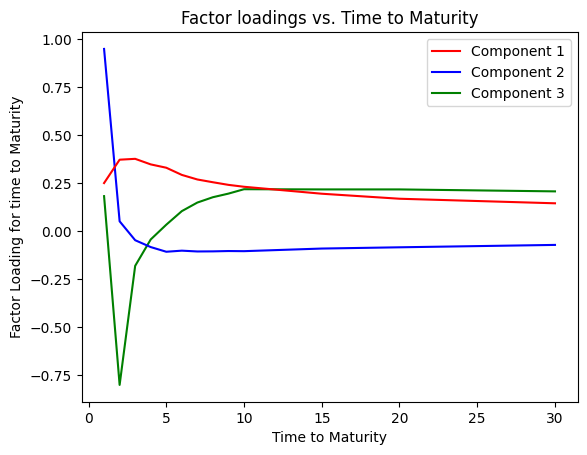

In [249]:
f_1, f_2, f_3 = pcaFit.components_[0:3]
yvec = np.array([1, 2, 3, 4, 5,6, 7,8,9, 10, 15, 20, 30])
lFrame = pd.DataFrame(data = np.transpose([yvec, f_1, f_2, f_3]), 
                      columns = ["Time to Maturity", "Comp. 1", "Comp. 2", "Comp. 3"])
lFrame["Time to Maturity"] = lFrame["Time to Maturity"].astype(int)

plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 1"], color = 'red',
          label = 'Component 1', zorder = 3)
plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 2"], color = 'blue',
          label = 'Component 2', zorder = 2)
plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 3"], color = 'green',
          label = 'Component 3', zorder = 1)
plt.xlabel("Time to Maturity")
plt.ylabel("Factor Loading for time to Maturity")
plt.title("Factor loadings vs. Time to Maturity")
plt.legend()
plt.show()

Note that the first component has all positive factor loadings; this corresponds to a parallel shift in the yield curve, as all rates go up (or down) together, though shorter term rates do so by a slightly bigger amount. This component explains $71.59\%$ of the variance, so most daily movements in term structure can be explained by said parallel shift. The second component has positive factor loadings for the short term but positive for the long term; this corresponds to a twisting of a term structure. This would mean that the yield curve increased in the short term while decreasing in the long term - or visa versa. The second component explains an additional $87.76 - 71.59 = 16.17\%$ of the variance, so it is significant. The third componnent has positive factor loadings for both short term maturity and long term maturity, but negative factor loadings in the middle, with the inflection point coming at 2 years. This corresponds to a change in curvature, or the movement in the point on the yield curve where the curve starts to flatten out or move in the opposite direction. It explains $95.42 - 87.76 = 7.66\%$ of the variance in daily rates.

I now calculate the standard deviations in the 3 principal components, which would just be the singular values of the decomposition performed previously, or $\sqrt{\lambda_1}, \sqrt{\lambda_2} \text{ and } \sqrt{\lambda_3}$:

In [245]:
stdDev = np.sqrt(pca.explained_variance_)
print(" sigma_1: {s1: .4f} \n sigma_2: {s2: .4f} \n sigma_3: {s3: .4f}".format(
    s1 = stdDev[0], s2 = stdDev[1], s3 = stdDev[2]))

 sigma_1:  0.1186 
 sigma_2:  0.0564 
 sigma_3:  0.0388


### c. Finding combinations for Stress Testing

Let $F$ be the matrix corresponding to the factor loadings. Then, $P = X \times F$ corresponds to the principal component score for each principal component for each observation. I peform this calculation, then find the means of the first three principal components: 

In [276]:
P = curveForPCA.values @ pca.components_
mu = np.average(P, axis = 0)[0:3]
print("First component mean:{mu_1: .6f}".format(mu_1 = mu[0]))
print("Second component mean:{mu_2: .6f}".format(mu_2 = mu[1]))
print("Third component mean:{mu_3: .6f}".format(mu_3 = mu[2]))

First component mean: 0.003887
Second component mean:-0.001062
Third component mean: 0.003294


Using the component means and standard deviations, I highlight the 8 scenarios of combinations of values:

In [288]:
pc1Val = np.round(np.array([mu[0] - 1.65*stdDev[0], mu[0] + 1.65*stdDev[0]]),6)
pc2Val = np.round(np.array([mu[1] - 1.65*stdDev[1], mu[1] + 1.65*stdDev[1]]), 6)
pc3Val = np.round(np.array([mu[2] - 1.65*stdDev[2], mu[2] + 1.65*stdDev[2]]), 6)
possibilities = list(itertools.product(pc1Val, pc2Val, pc3Val))
possibilities

[(-0.191885, -0.094106, -0.060753),
 (-0.191885, -0.094106, 0.067341),
 (-0.191885, 0.091983, -0.060753),
 (-0.191885, 0.091983, 0.067341),
 (0.199658, -0.094106, -0.060753),
 (0.199658, -0.094106, 0.067341),
 (0.199658, 0.091983, -0.060753),
 (0.199658, 0.091983, 0.067341)]

### d. Translating Bumps to Exponential Plotting

Using these possible values, I plot interest rate changes against time to maturity under each scenario:

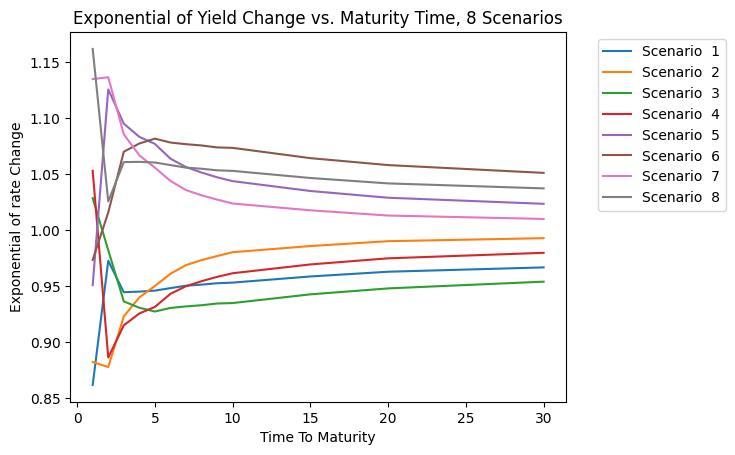

In [312]:
factor_inv = np.linalg.inv(pca.components_)
fig = plt.figure()
ax = plt.subplot(111)

for i in range(len(possibilities)):
    full_pc = np.append(np.asarray(possibilities[i]), [0]*10)
    changes = factor_inv @ full_pc
    ax.plot(lFrame["Time to Maturity"], np.exp(changes),
             label = "Scenario {num: .0f}".format(num = i + 1))
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel("Time To Maturity")
ax.set_ylabel("Exponential of rate Change")
ax.set_title("Exponential of Yield Change vs. Maturity Time, 8 Scenarios")
plt.show()

## $\underline{\text{Question 5}}$

In [ ]:
default_spread = 200
zrate = .05
hrate = 0.04
S_t = np.exp(-1 * hrate)


In [ ]:
def discount(t):
    